# **Sesión 9**
## Análisis de Datos con Python
### José David Mendoza Pérez

<img src="https://github.com/Altroud/Viernes_de_Codigo/raw/main/Formaci%C3%B3n%20Complementaria%20-%20Manejo%20de%20Dataframes%20;%20An%C3%A1lisis%20de%20Datos/uninorte.png" width="1400" height="600">

---
```python
#Paquetes que usaremos en esta sesión
Statsmodel
Scikit-learn
Pandas
Numpy
Seaborn
Matplotlib

En caso de no contar con estos paquetes en su entorno de trabajo, por favor ejecute el siguiente código:

%pip install statsmodel
%pip install scikit-learn
%pip install pandas
%pip install numpy
%pip install seaborn
%pip install matplotlib
```

---

<details>

<summary>Objetivos</summary>

## Objetivos de Esta Sesión
👌 Realizar regresiones lineales utilizando Python.  
👌 Aprender métodos de visualización.  
👌 Conocer los diferentes tipos de gráficas disponibles en Python.

---
<details>

<summary>Base de Datos</summary>

## Boston House Prices

(nota: En esta sesión se trabajará con una base de datos obtenida de la librería scikit-learn, pero fue descontinuado por razones éticas desde la versión. Aún así, pueden encontrarlo en internet como Boston House Prices para el año 1978 junto con el estudio del cual hace parte. La base se encuentra en el apartado de insumos sesión 9 del repositorio, si desean trabajar con ella. Aún así, siéntase libre de usar la base de datos que se le pidió).

Nuestra base de datos a utilizar para la parte de las regresiones sera *Boston House Prices*, la cual contiene información sobre el precio de las casas de la ciudad de Boston.

Como todo análisis de datos empezaremos por realizar el análisis exploratorio de los datos para conocer su *naturaleza*, *estructura* y *que tipo de información estamos trabajando*.  

---
<details>

<summary>Análisis Exploratorio</summary>

## Análisis Exploratorio

```python
import pandas as pd
df = pd.read_csv("Boston House Prices.csv")
df.info()
```
Tenemos un dataframe en formato *Long* que contiene información acerca de cuantos cuartos posee la casa, la distancia desde la casa a su centro de trabajo, y el valor de la misma expresado en miles de dolares.

La base de datos en total contiene *506 observaciones* y *3 campos*. ¿Es necesario realizar un tratamiento a estos datos?

No, esta base de datos viene preparada para la fase de análisis sin necesidad de realizar un tratamiento previo.

<details>

<summary>Estadisticas Descriptivas</summary>

## Estadisticas Descriptivas

El análisis de estos datos puede iniciar realizando unas *estadisticas despcritivas* para las tres variables buscando conocer un poco mas el dataset.

```python
df.describe()
```

Esta tabla refleja información descriptiva del dataset; I) La media de cuartos es **6.28**, de la distancia al centro de trabajo es **3.79** y el valor de las casas es **22.53**.  II) El valor maximo para cada variable es: 8, 12.12 y 50 respectivamente.

<details>

<summary>Regresión</summary>

## ¿Qué es una Regresión?

En terminos simples, una regresión es una técnica estadística que permite *predecir* el comportamiento de una variable (llamada *regresando*) dependiendo del comportamiento independiente de variables *regresoras*. La estructura básica de un modelo de regresión lineal suele ser la siguiente:

$$Y = \beta_0 + \beta_nXn + \varepsilon$$

Donde $Y$ es nuestra variable dependiente (*regresando*) y $X_n$ nuestras variables independientes (*regresoras*). El coeficiente $\beta_0$ representa un efecto fijo en nuestro modelo de regresión, y $\beta_n$ representa el efecto de nuestras variables regresoras en la predicción de nuestro modelo.

<details>

<summary>Tipos de Regresión</summary>

## Tipos de Regresión

Tenemos dos tipos de regresión: *Simple* y *Multiple*. La diferencia entre un tipo y otro radica en el número de variables regresoras que se están utilizando. Las consideraciones econométricas entre uno y otro modelo serán distintas. Para mayor profundidad acerca de esto, por favor revisen sus notas de Econometría I y II (para quienes ya dieron ese curso). 

Realicemos primero una regresión simple: la variable *regresando* va a ser el valor de la casa, y la variable *regresora* va a ser el número de cuartos de la casa.

<details>

<summary>Statsmodels</summary>

## Usando Statsmodels

<details>

<summary>Regresión Simple</summary>

### Regresión Simple

```python
import statsmodels.api as sm
x = df['Rooms']
y = df['Value']
#grafico de dispersion
df.plot(kind='scatter',x='Rooms',y='Value')
```

Primero grafiquemos el gráfico de dispersión de estas variables.
Ahora, empecemos la construcción de nuestro modelo de regresión:

```python
#modelo
x = sm.add_constant(x)
lm=sm.OLS(y,x).fit()
lm.predict(x)

#tabla de regresion
lm.summary()
#ecuacion
y_pred=9.1021*x['Rooms']-34.6706
```

Agregamos una constante (debido a que statsmodels no la agrega por nosotros), ajustamos el modelo (le decimos que variables van a ser las dependientes e independientes). y Creamos la tabla de regresión.

```python
#grafica final
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4), tight_layout=True)
sns.scatterplot(x=x['Rooms'],y=y)
sns.lineplot(x=x['Rooms'],y=y_pred,color='red')
plt.xlim(0)
plt.ylim(0)
plt.savefig('linear_regression')
plt.show()
```

Por último, realizamos un gráfico final donde esté representado dicho modelo de regresión.

<details>

<summary>Regresión Múltiple</summary>

### Regresión Múltiple

```python
#regresion lineal multiple statsmodels
x2 = df[['Rooms','Distance']]
y2 = df['Value']
#modelo
x2 = sm.add_constant(x2)
lm2 = sm.OLS(y2,x2).fit()
lm2.summary()
```

<details>

<summary>Scikit-Learn</summary>

### Lo mismo, pero utilizando Scikit-learn

```python
from sklearn import linear_model
y3=df['Value']
x3=df[['Rooms','Distance']]
lm3=linear_model.LinearRegression()
lm3.fit(x3,y3)
lm3.predict(x3)[:5]
#r2
lm3.score(x3,y3)
#coeficiente
lm3.coef_
#intercepto
lm3.intercept_
```

---

<details>

<summary>Gráficos</summary>

## Diferentes Gráficos

En esta sección aprenderemos a realizar diferentes tipos de gráficos en python:

🤠 Líneas  
🤠 Barras
🤠 Dispersión  
🤠 Matriz de Correlación  
🤠 Múltiples Subgráficos  
🤠 y Más  

NOTA: Realizar gráficos puede ser la tarea más complicada dependiendo de que queramos realizar (por ejemplo, si queremos graficar alguna relación que hayamos obtenido mediante un estudio econométrico), y por ende existen muchas maneras de graficar. Por lo tanto, puede llamársele *el arte de la visualización*,  *ergo* no existe una forma correcta de graficar, pues depende de qué sea lo que buscamos. Todo esto se aprende *experimentando*.

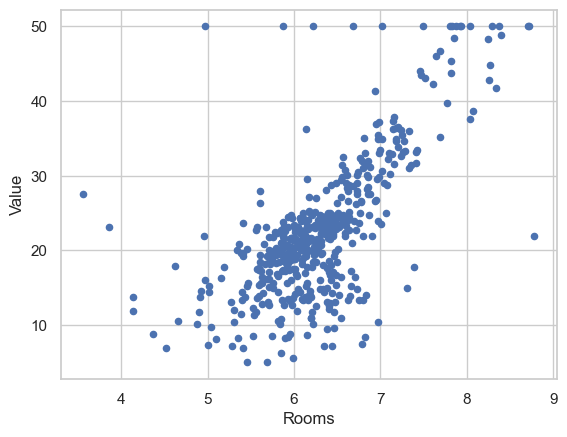

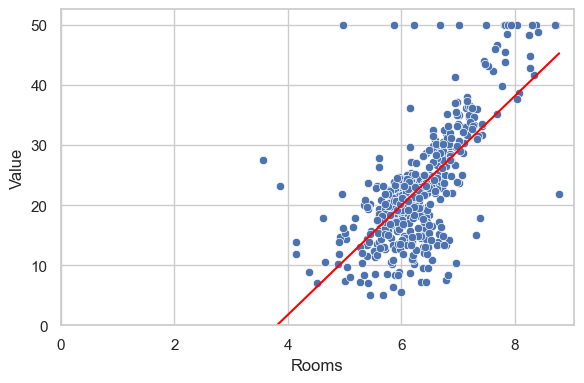

-34.6360501754733

In [56]:
# Regresión Lineal
# Cargar Nuestros Datos
import pandas as pd
df = pd.read_csv("Boston House Prices.csv")
# Análisis Exploratorio
# df.info()
# Ajustar la Variable Rooms
# Estadisticas Descriptivas
df.describe()

# Regresión Lineal Simple con Statsmodels
import statsmodels.api as sm
x = df['Rooms']
y = df['Value']
# Gráfico de Dispersión
df.plot(kind='scatter',x='Rooms',y='Value')
# Modelo
x = sm.add_constant(x)
lm=sm.OLS(y,x).fit()
lm.predict(x)

# Tabla de Regresión
lm.summary()
#ecuacion
y_pred=9.1021*x['Rooms']-34.6706
# Gráfica Final
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4), tight_layout=True)
sns.scatterplot(x=x['Rooms'],y=y)
sns.lineplot(x=x['Rooms'],y=y_pred,color='red')
plt.xlim(0)
plt.ylim(0)
plt.savefig('linear_regression')
plt.show()

# Regresión Lineal Múltiple Statsmodels
x2 = df[['Rooms','Distance']]
y2 = df['Value']
#modelo
x2 = sm.add_constant(x2)
lm2 = sm.OLS(y2,x2).fit()
lm2.summary()

# Lo mismo pero scikitlearn
from sklearn import linear_model
y3=df['Value']
x3=df[['Rooms','Distance']]
lm3=linear_model.LinearRegression()
lm3.fit(x3,y3)
lm3.predict(x3)[:5]
#r2
lm3.score(x3,y3)
#coeficiente
lm3.coef_
#intercepto
lm3.intercept_





<Axes: xlabel='carat', ylabel='price'>

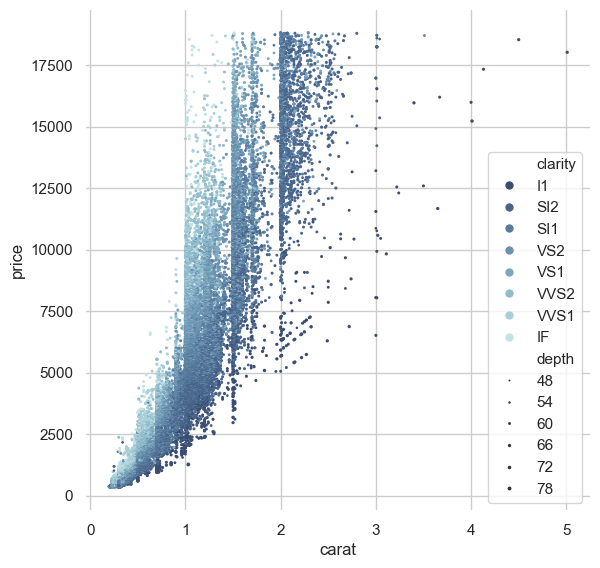

In [57]:
# Gráficas
# Dispersión
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Load the example diamonds dataset
diamonds = sns.load_dataset("diamonds")

# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
sns.scatterplot(x="carat", y="price",
                hue="clarity", size="depth",
                palette="ch:r=-.2,d=.3_r",
                hue_order=clarity_ranking,
                sizes=(1, 8), linewidth=0,
                data=diamonds, ax=ax)

<Axes: xlabel='timepoint', ylabel='signal'>

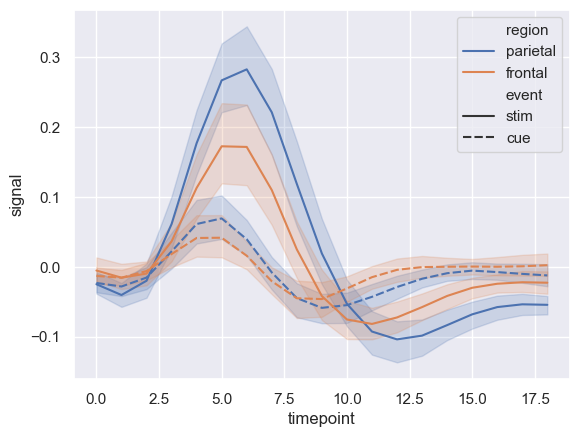

In [58]:
# Líneas
import seaborn as sns
sns.set_theme(style="darkgrid")

# Load an example dataset with long-form data
fmri = sns.load_dataset("fmri")

# Plot the responses for different events and regions
sns.lineplot(x="timepoint", y="signal",
            hue="region", style="event",
            data=fmri)

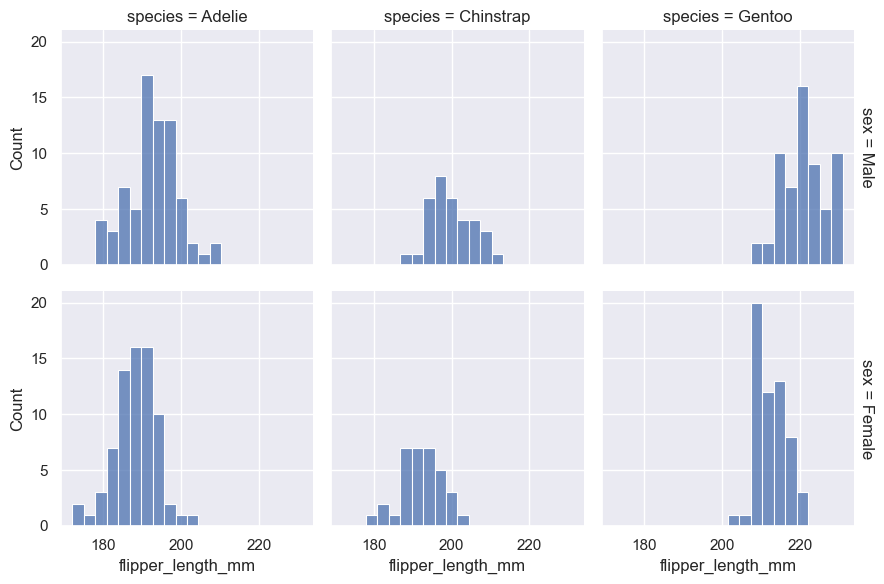

In [59]:
# Histograma
import seaborn as sns

sns.set_theme(style="darkgrid")
df = sns.load_dataset("penguins")
sns.displot(
    df, x="flipper_length_mm", col="species", row="sex",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

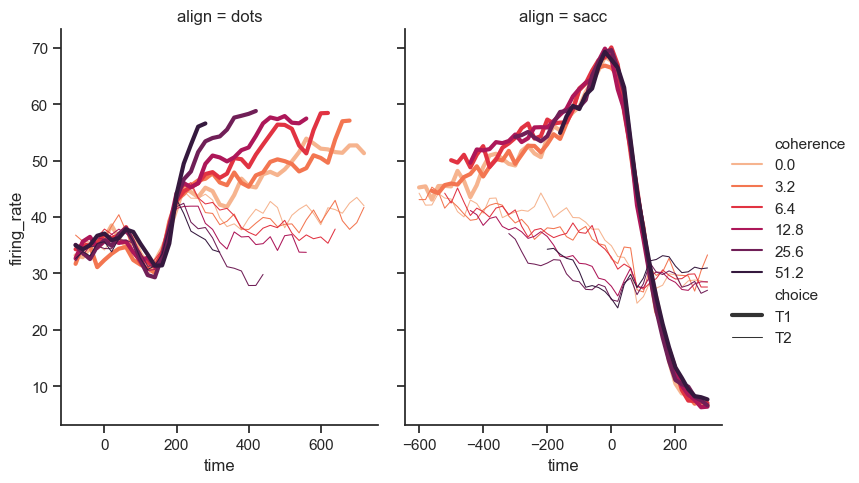

In [60]:
# Míltiples Gráficos Lineales
import seaborn as sns
sns.set_theme(style="ticks")

dots = sns.load_dataset("dots")

# Define the palette as a list to specify exact values
palette = sns.color_palette("rocket_r")

# Plot the lines on two facets
sns.relplot(
    data=dots,
    x="time", y="firing_rate",
    hue="coherence", size="choice", col="align",
    kind="line", size_order=["T1", "T2"], palette=palette,
    height=5, aspect=.75, facet_kws=dict(sharex=False),
)


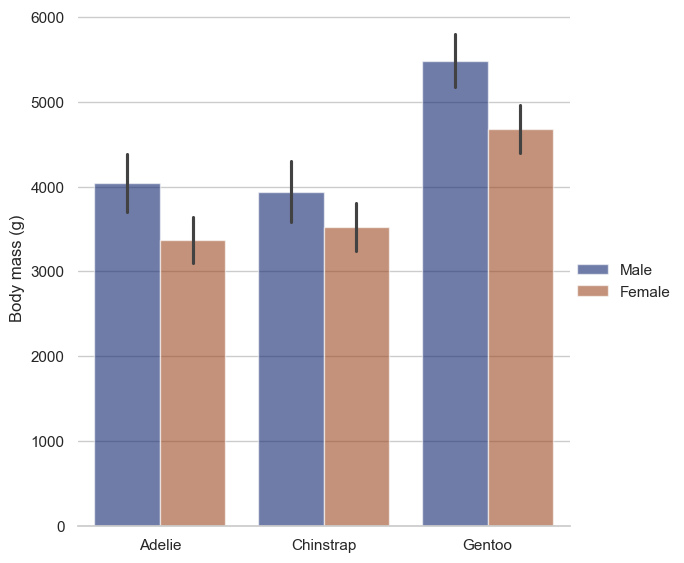

In [61]:
# Barras Agrupadas
import seaborn as sns
sns.set_theme(style="whitegrid")

penguins = sns.load_dataset("penguins")

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=penguins, kind="bar",
    x="species", y="body_mass_g", hue="sex",
    errorbar="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Body mass (g)")
g.legend.set_title("")

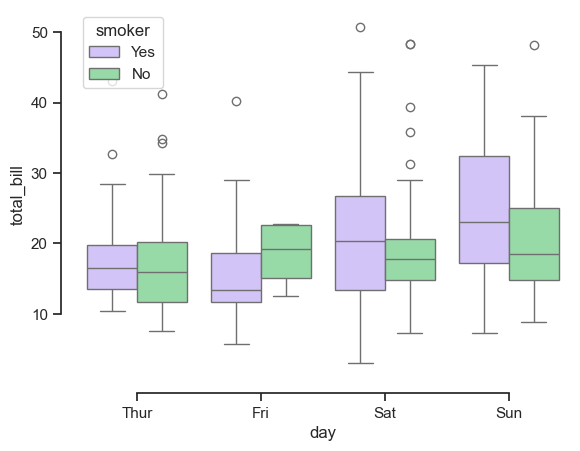

In [62]:
# Cajas y Bigotes
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")

# Load the example tips dataset
tips = sns.load_dataset("tips")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="day", y="total_bill",
            hue="smoker", palette=["m", "g"],
            data=tips)
sns.despine(offset=10, trim=True)

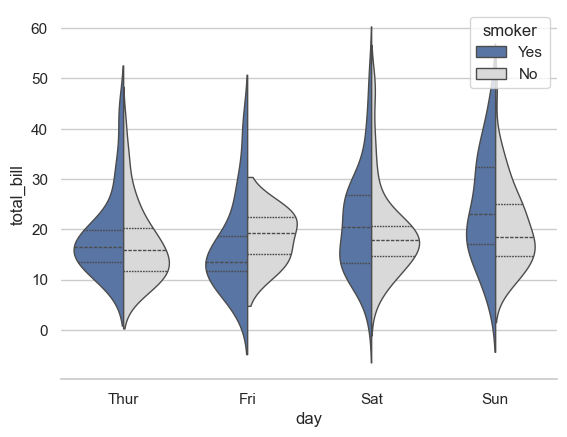

In [63]:
# Violín
import seaborn as sns
sns.set_theme(style="whitegrid")

# Load the example tips dataset
tips = sns.load_dataset("tips")

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(data=tips, x="day", y="total_bill", hue="smoker",
               split=True, inner="quart", linewidth=1,
               palette={"Yes": "b", "No": ".85"})
sns.despine(left=True)

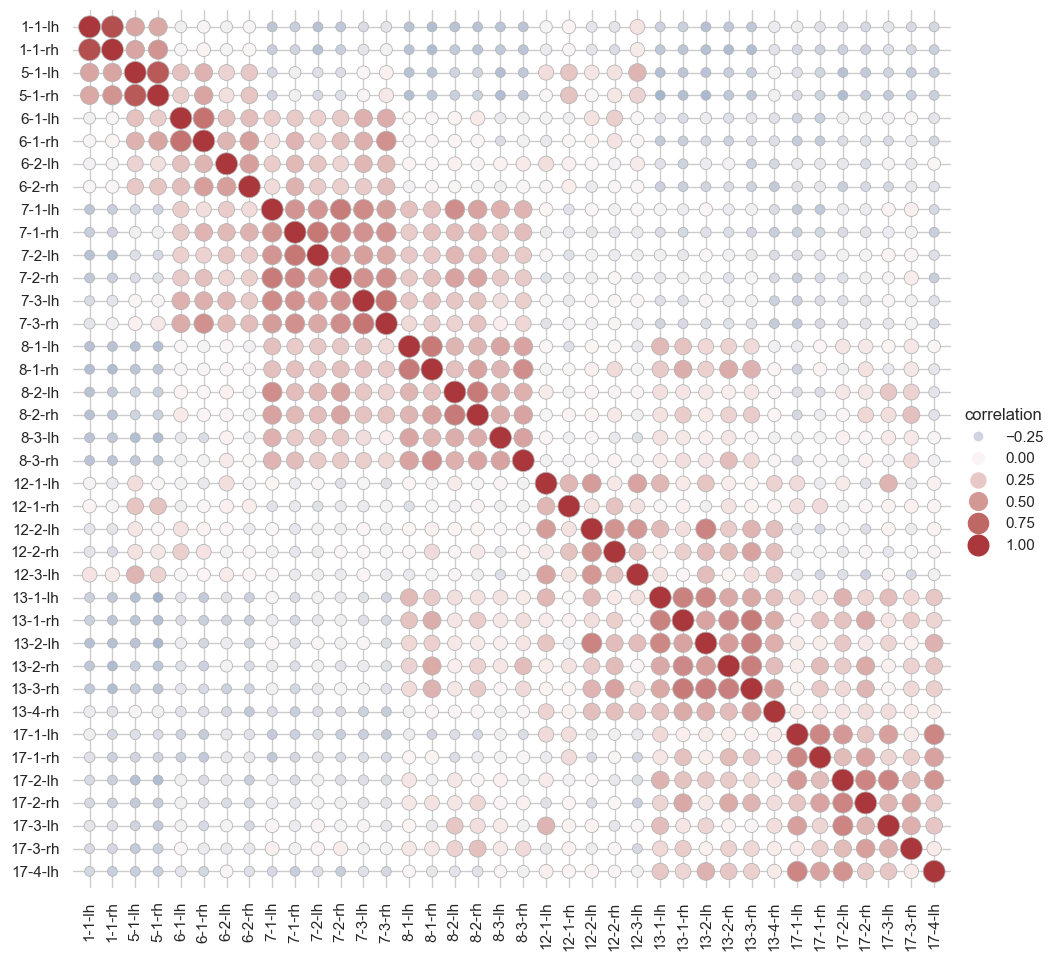

In [64]:
# Matriz de Correlación

import seaborn as sns
sns.set_theme(style="whitegrid")

# Load the brain networks dataset, select subset, and collapse the multi-index
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns
                  .get_level_values("network")
                  .astype(int)
                  .isin(used_networks))
df = df.loc[:, used_columns]

df.columns = df.columns.map("-".join)

# Compute a correlation matrix and convert to long-form
corr_mat = df.corr().stack().reset_index(name="correlation")

# Draw each cell as a scatter point with varying size and color
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
)

# Tweak the figure to finalize
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)

<Axes: >

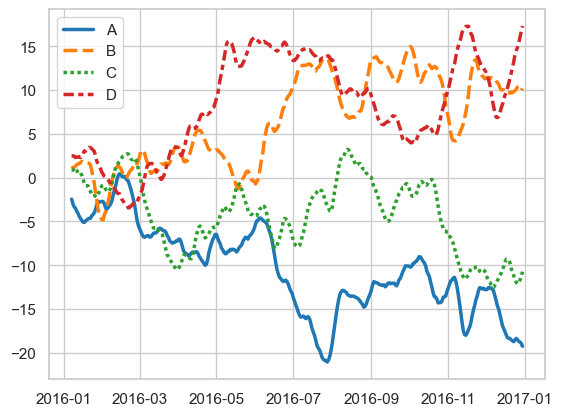

In [65]:
# Líneas
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid")

rs = np.random.RandomState(365)
values = rs.randn(365, 4).cumsum(axis=0)
dates = pd.date_range("1 1 2016", periods=365, freq="D")
data = pd.DataFrame(values, dates, columns=["A", "B", "C", "D"])
data = data.rolling(7).mean()

sns.lineplot(data=data, palette="tab10", linewidth=2.5)